In [1]:
using Plots
using LinearAlgebra
using NumericalIntegration
using Distributions

In [3]:
using LaTeXStrings

# 1. Set the backend (GR is the default, fast, and handles this well)
gr()

# 2. Configure Global Settings for Retina + LaTeX Look
default(
    # Retina / High-DPI settings
    fmt = :png,         # PNG renders faster than SVG for complex plots
    dpi = 300,          # 300 DPI makes it crisp on Retina screens (standard is 72-100)
    
    # LaTeX Font settings
    fontfamily = "Computer Modern", # Use the standard LaTeX font
    guidefontsize = 12,             # Adjust font sizes for readability
    tickfontsize = 10,
    legendfontsize = 10
)

SINGLE PARTICLE DENSITY OF STATES

In [2]:
function naive_degeneracy(Emax)
    count = Dict{Float64, Int}()
    for i in 0:Emax
        for j in 0:Emax
            for k in 0:Emax
                E = i + j + k
                if E <= Emax
                    count[E] = get(count, E, 0) + 1
                end
            end
        end
    end
    return count
end

naive_degeneracy (generic function with 1 method)

In [8]:
for (E, g) in sort(collect(naive_degeneracy(20)))
    println("E = $E , N(E) = $g")
end

E = 0.0 , N(E) = 1
E = 1.0 , N(E) = 3
E = 2.0 , N(E) = 6
E = 3.0 , N(E) = 10
E = 4.0 , N(E) = 15
E = 5.0 , N(E) = 21
E = 6.0 , N(E) = 28
E = 7.0 , N(E) = 36
E = 8.0 , N(E) = 45
E = 9.0 , N(E) = 55
E = 10.0 , N(E) = 66
E = 11.0 , N(E) = 78
E = 12.0 , N(E) = 91
E = 13.0 , N(E) = 105
E = 14.0 , N(E) = 120
E = 15.0 , N(E) = 136
E = 16.0 , N(E) = 153
E = 17.0 , N(E) = 171
E = 18.0 , N(E) = 190
E = 19.0 , N(E) = 210
E = 20.0 , N(E) = 231


In [4]:
function naive_degeneracy_cube(Emax)
    nmax = floor(Int, sqrt(Emax))
    count = Dict{Float64, Int}()
    for i in -nmax:nmax
        for j in -nmax:nmax
            for k in -nmax:nmax
                E = i^2 + j^2 + k^2
                if abs(E) <= Emax
                    count[E] = get(count, E, 0) + 1
                end
            end
        end
    end
    return count
end

naive_degeneracy_cube (generic function with 1 method)

In [9]:
for (E, g) in sort(collect(naive_degeneracy_cube(20)))
    println("E = $E , N(E) = $g")
end

E = 0.0 , N(E) = 1
E = 1.0 , N(E) = 6
E = 2.0 , N(E) = 12
E = 3.0 , N(E) = 8
E = 4.0 , N(E) = 6
E = 5.0 , N(E) = 24
E = 6.0 , N(E) = 24
E = 8.0 , N(E) = 12
E = 9.0 , N(E) = 30
E = 10.0 , N(E) = 24
E = 11.0 , N(E) = 24
E = 12.0 , N(E) = 8
E = 13.0 , N(E) = 24
E = 14.0 , N(E) = 48
E = 16.0 , N(E) = 6
E = 17.0 , N(E) = 48
E = 18.0 , N(E) = 36
E = 19.0 , N(E) = 24
E = 20.0 , N(E) = 24


TRAPPED BOSONS (CANONICAL ENSEMBLE)

In [15]:
function canonic_bosons(step_integration, beta, N_particles, Emax)
    Z = 0.0
    E = 0.0
    N = 0.0
    degeneracy_dict = naive_degeneracy(Emax)
    for i in -pi:step_integration:pi
        z = (1-exp(-im*i*(N_particles+1)))/(1-exp(-im*i))
        e = 0.0
        for p in 1:Emax
            number = get(degeneracy_dict, Float64(p), 0)
            z = z*(1 - exp(-beta*p)*exp(im*i))^(-number)
            e += number * p * exp(-beta*p) * exp(im*i)/ (1 - exp(-beta*p) * exp(im*i))
        end
        Z += z * exp(-im*i*N_particles)/ (2*pi)
        E += e * z * exp(-im*i*N_particles)/ (2*pi)
    end
    E /= Z
    return E, Z
end

canonic_bosons (generic function with 1 method)

In [17]:
beta_list = collect(0.1:0.1:2.0)
E_list = Float64[]
for beta in beta_list
    E, Z = canonic_bosons(0.01, beta, 10, 20)
    push!(E_list, real(E))
end

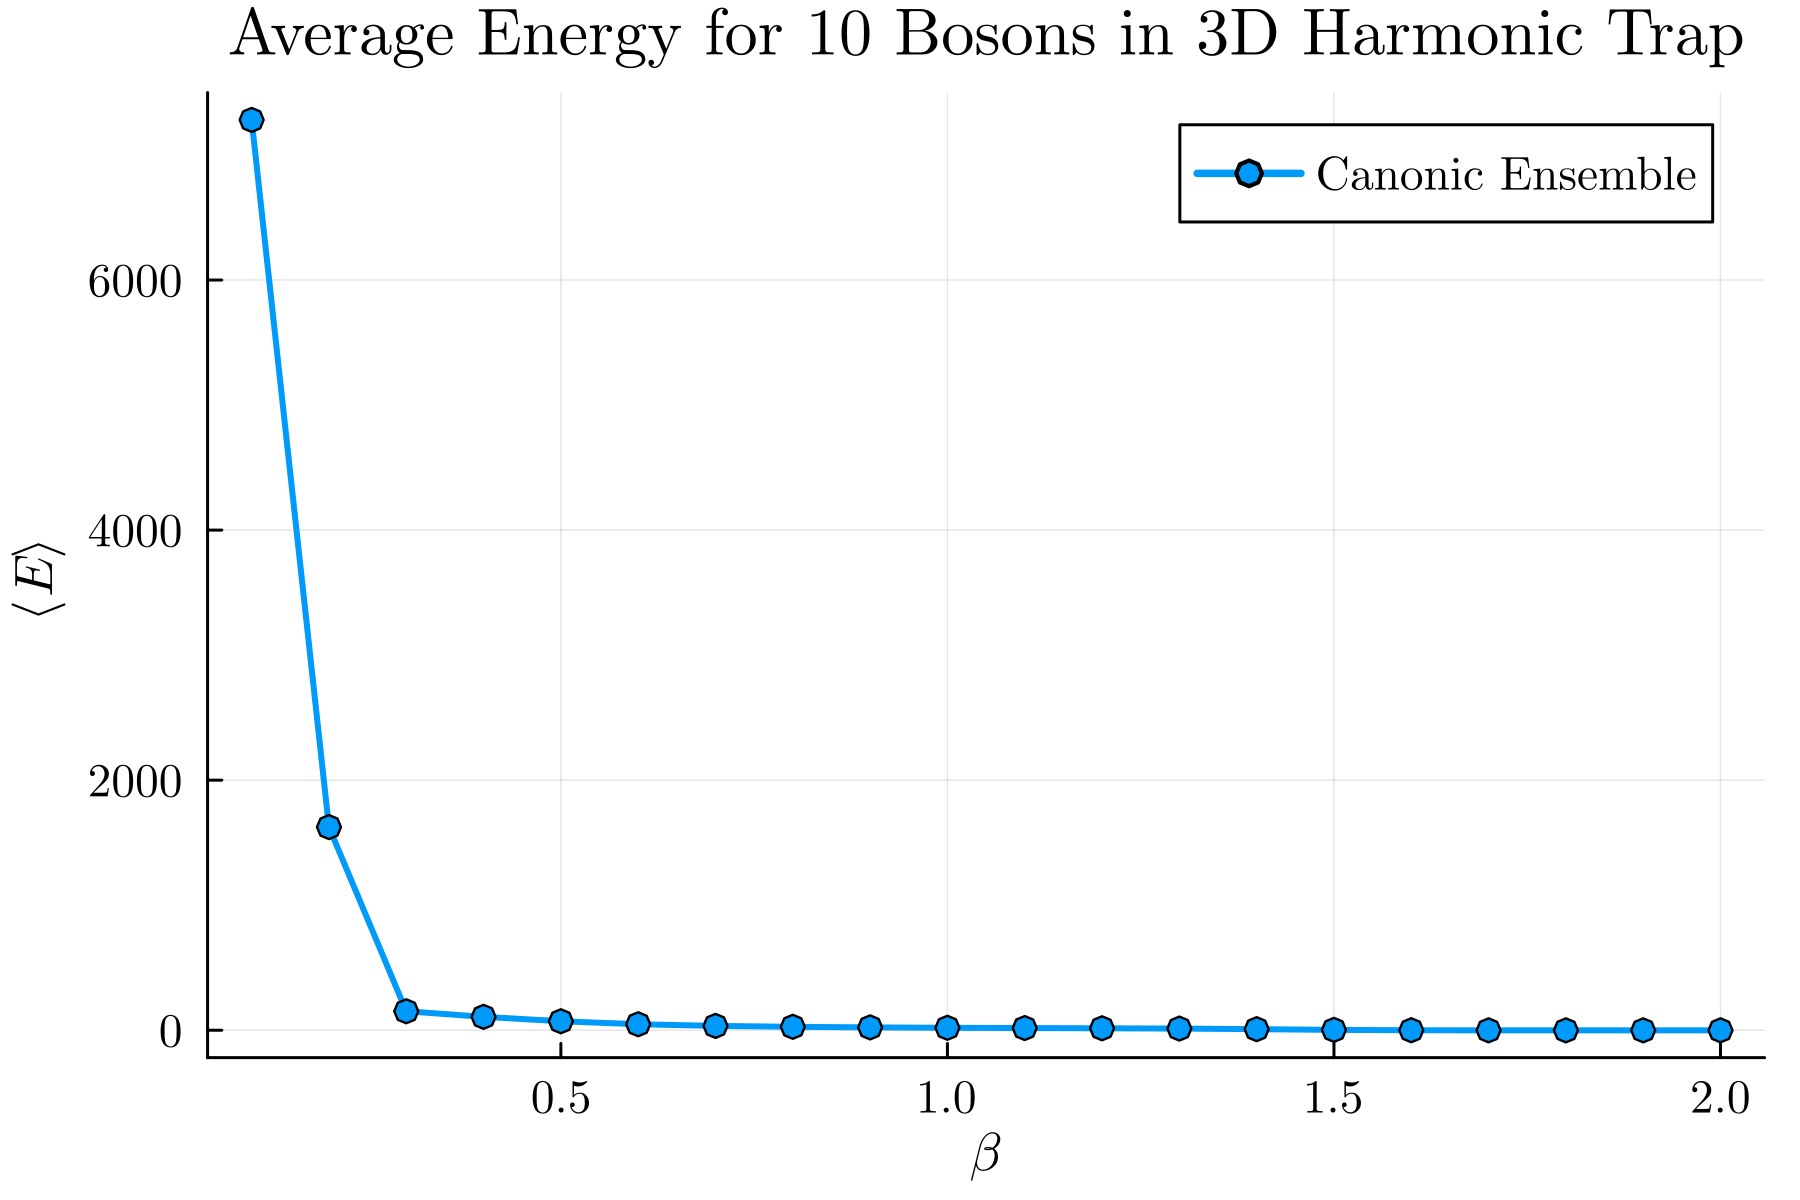

In [19]:
plot()
plot(beta_list, E_list, 
    xlabel = L"\beta", 
    ylabel = L"\langle E \rangle", 
    label = "Canonic Ensemble",
    legend = :topright,
    lw = 2,
    marker = :o,
    markersize = 4,
    title = "Average Energy for 10 Bosons in 3D Harmonic Trap"
)